# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd


# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [3]:
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.740000e+12
1,South Michelleport,2019-03-04 18:24,30.24,2.340000e+12
2,Port Samanthamouth,2019-02-24 04:29,33.44,2.010000e+12
3,Rodneyfort,2019-02-10 23:22,23.44,5.150000e+12
4,South Jack,2019-03-06 04:28,34.58,3.910000e+12
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04,13.38,8.550000e+12
2371,Lake Latoyabury,2019-01-30 00:05,20.76,9.020000e+12
2372,North Jaime,2019-02-10 21:03,11.11,2.780000e+12
2373,West Heather,2019-05-07 19:22,44.94,4.260000e+12


In [4]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,2019-03-06 04:28,34.58,3.910000e+12,46,Urban


In [6]:
pyber_data_df.get('date', default=0)

0       2019-01-14 10:14
1       2019-03-04 18:24
2       2019-02-24 04:29
3       2019-02-10 23:22
4       2019-03-06 04:28
              ...       
2370    2019-04-29 17:04
2371    2019-01-30 00:05
2372    2019-02-10 21:03
2373    2019-05-07 19:22
2374    2019-04-25 10:20
Name: date, Length: 2375, dtype: object

### Merge the DataFrames

## Deliverable 1: Get a Summary DataFrame 

In [7]:
#  1. Get the total rides for each city type
ride_count_by_ct = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_count_by_ct

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [8]:
date_count_by_ct = pyber_data_df.groupby(["type"]).count()["date"]
date_count_by_ct

type
Rural        125
Suburban     625
Urban       1625
Name: date, dtype: int64

In [9]:
# 2. Get the total drivers for each city type
driver_count_by_ct = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_count_by_ct.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [10]:
#  3. Get the total amount of fares for each city type
total_fares_by_ct = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_ct

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [11]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride_by_ct = total_fares_by_ct / ride_count_by_ct
avg_fare_per_ride_by_ct

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [12]:
# 5. Get the average fare per driver for each city type. 
avg_fares_by_driver =  total_fares_by_ct / driver_count_by_ct
avg_fares_by_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [13]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df= pd.DataFrame({
    'Total Rides': ride_count_by_ct,
    'Total Drivers': driver_count_by_ct,
    'Total Fares': total_fares_by_ct,
    'Average Fare per Ride': avg_fare_per_ride_by_ct,
    'Average Fare per Driver': avg_fares_by_driver})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [14]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [15]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [16]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,2019-03-06 04:28,34.58,3.910000e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04,13.38,8.550000e+12,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05,20.76,9.020000e+12,2,Rural
2372,North Jaime,2019-02-10 21:03,11.11,2.780000e+12,1,Rural
2373,West Heather,2019-05-07 19:22,44.94,4.260000e+12,4,Rural


In [17]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_td_df = pyber_data_df.groupby(["date", "type"]).sum()[["fare"]]
fares_by_td_df

,,fare
date,type,
2019-01-01 00:08,Urban,37.91
2019-01-01 00:46,Suburban,47.74
2019-01-01 02:07,Suburban,24.07
2019-01-01 03:46,Urban,7.57
2019-01-01 05:23,Urban,10.75
...,...,...
2019-05-08 04:20,Urban,21.99
2019-05-08 04:39,Urban,18.45
2019-05-08 07:29,Urban,18.55


In [18]:
# 3. Reset the index on the DataFrame you created in #1. 
#This is needed to use the 'pivot()' function.use:  df.reset_index()

fares_by_td_df = fares_by_td_df.reset_index()
fares_by_td_df

,date,type,fare
0,2019-01-01 00:08,Urban,37.91
1,2019-01-01 00:46,Suburban,47.74
2,2019-01-01 02:07,Suburban,24.07
3,2019-01-01 03:46,Urban,7.57
4,2019-01-01 05:23,Urban,10.75
...,...,...,...
2359,2019-05-08 04:20,Urban,21.99
2360,2019-05-08 04:39,Urban,18.45
2361,2019-05-08 07:29,Urban,18.55
2362,2019-05-08 11:38,Urban,19.77


In [19]:
fares_by_td_df.get('date', default=0)

0       2019-01-01 00:08
1       2019-01-01 00:46
2       2019-01-01 02:07
3       2019-01-01 03:46
4       2019-01-01 05:23
              ...       
2359    2019-05-08 04:20
2360    2019-05-08 04:39
2361    2019-05-08 07:29
2362    2019-05-08 11:38
2363    2019-05-08 13:10
Name: date, Length: 2364, dtype: object

In [20]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. type + date (td)
fares_by_td_df = fares_by_td_df.pivot(index= "date", columns="type", values="fare")
fares_by_td_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08,NaN,NaN,37.91
2019-01-01 00:46,NaN,47.74,NaN
2019-01-01 02:07,NaN,24.07,NaN
2019-01-01 03:46,NaN,NaN,7.57
2019-01-01 05:23,NaN,NaN,10.75
2019-01-01 09:45,43.69,NaN,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31


In [21]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'

fares_by_td_df = fares_by_td_df.loc['2019-01-01':'2019-04-29']
fares_by_td_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08,NaN,NaN,37.91
2019-01-01 00:46,NaN,47.74,NaN
2019-01-01 02:07,NaN,24.07,NaN
2019-01-01 03:46,NaN,NaN,7.57
2019-01-01 05:23,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28,NaN,NaN,11.46
2019-04-28 16:29,NaN,NaN,36.42
2019-04-28 17:26,NaN,NaN,31.43


In [22]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
type(fares_by_td_df.index)

fares_by_td_df.index= pd.to_datetime(fares_by_td_df.index)
fares_by_td_df.index

DatetimeIndex(['2019-01-01 00:08:00', '2019-01-01 00:46:00',
               '2019-01-01 02:07:00', '2019-01-01 03:46:00',
               '2019-01-01 05:23:00', '2019-01-01 09:45:00',
               '2019-01-01 12:32:00', '2019-01-01 14:40:00',
               '2019-01-01 14:42:00', '2019-01-01 14:52:00',
               ...
               '2019-04-28 09:25:00', '2019-04-28 10:54:00',
               '2019-04-28 11:40:00', '2019-04-28 11:49:00',
               '2019-04-28 12:48:00', '2019-04-28 14:28:00',
               '2019-04-28 16:29:00', '2019-04-28 17:26:00',
               '2019-04-28 17:38:00', '2019-04-28 19:35:00'],
              dtype='datetime64[ns]', name='date', length=2182, freq=None)

In [30]:
pyber_data_df.index = pd.to_datetime(pyber_data_df.index)
pyber_data_df


,city,fare,ride_id,driver_count,type
date,,,,,
2019-01-14 10:14:00,Lake Jonathanshire,13.83,5.740000e+12,5,Urban
2019-03-04 18:24:00,South Michelleport,30.24,2.340000e+12,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2.010000e+12,57,Urban
2019-02-10 23:22:00,Rodneyfort,23.44,5.150000e+12,34,Urban
2019-03-06 04:28:00,South Jack,34.58,3.910000e+12,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:00,Michaelberg,13.38,8.550000e+12,6,Rural
2019-01-30 00:05:00,Lake Latoyabury,20.76,9.020000e+12,2,Rural
2019-02-10 21:03:00,North Jaime,11.11,2.780000e+12,1,Rural


In [34]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_by_td_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 19:35:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [41]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_data = fares_by_td_df.resample('W').sum()

weekly_fares_data

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


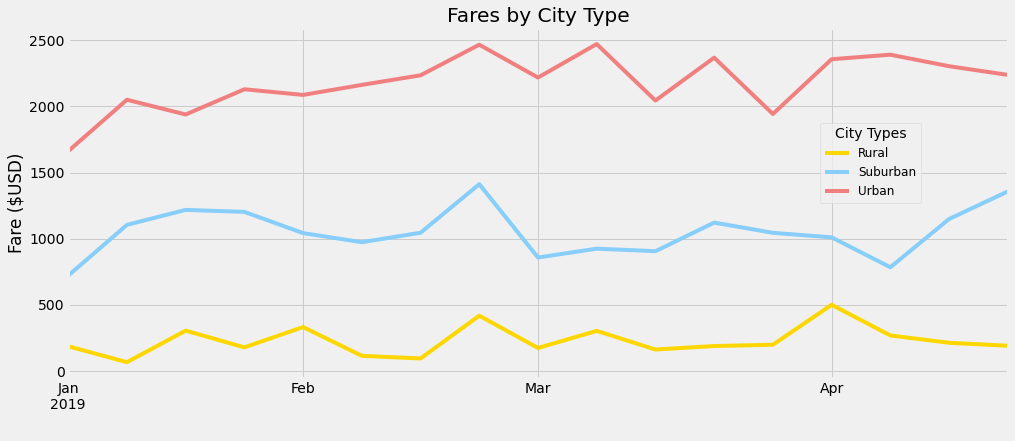

In [43]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,6))
weekly_fares_data.plot(kind="line", ax=ax, color=["gold", "lightskyblue", "lightcoral"])
ax.set_title("Fares by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel(" ")
lgnd = plt.legend(fontsize="12", mode="Expanded", loc=(0.8,0.5), title="City Types")

# Save Figure
plt.savefig("analysis/PyBer_fare_summary.png")

plt.show()
